In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.linalg import hadamard
import scipy.signal
import pylab
from scipy.misc import derivative

def db(x):
    """ Convert linear value to dB value """
    return 10*np.log10(abs(x))

# How does correlation work in the FFT

expected: 0.0009765625 actual: [0.00193654 0.00105242 0.00083939 ... 0.00089814 0.00083939 0.00105242]
expected: 0.0009765625 actual: [0.         0.00086683 0.00098963 ... 0.00096745 0.00098963 0.00086683]
expected: 3.814697265625e-06 actual: [8.25151966e-06 3.90161450e-06 3.40153009e-06 ... 3.07187464e-06
 3.40153009e-06 3.90161450e-06]
expected: 0.001953125 actual: (0.0019531874885146+0j)


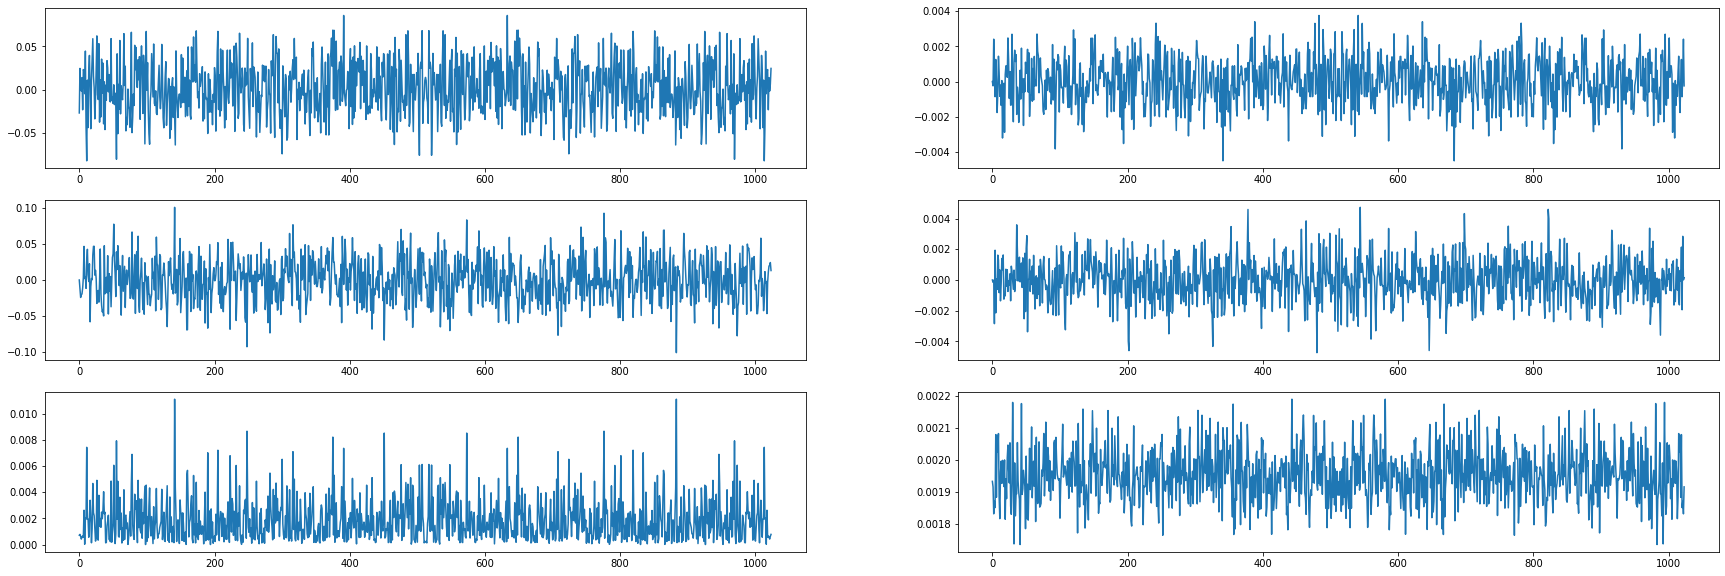

In [142]:
fig, ax = plt.subplots(3,2, figsize = (30,10))
nffts = 512
num_samples = 1024
variance = 2



corrs = np.zeros((nffts,num_samples),dtype=np.complex)
ffts = np.zeros((nffts,num_samples),dtype=np.complex)

for i in range(nffts):
    samples = np.random.normal(0, np.sqrt(variance), num_samples) 
    fftavg = np.fft.fft(samples)/num_samples
    ffts[i][:] = fftavg
    pwr = fftavg*np.conj(fftavg)
    corrs[i][:] = pwr
    
    
corr = np.mean(corrs,axis=0)
fft = np.mean(ffts,axis=0,dtype=np.complex)
    
ax[0,0].plot(ffts[1][:].real)
ax[1,0].plot(ffts[1][:].imag)
ax[2,0].plot(corrs[1][:])

ax[0,1].plot(fft.real)
ax[1,1].plot(fft.imag)
ax[2,1].plot(corr)

varpart = variance/(2*num_samples)

print('expected:', variance/(2*num_samples), 'actual:', np.var(ffts.real,axis=0,ddof=1))
print('expected:', variance/(2*num_samples), 'actual:', np.var(ffts.imag,axis=0,ddof=1))
print('expected:', 4*varpart**2 ,'actual:', np.var(corrs,axis=0,ddof=1))


print('expected:', 2*varpart ,'actual:', np.mean(corr))

# What about sum of signals

expected: 0.0029296875 actual: [0.00563273 0.00279853 0.00294775 ... 0.00282665 0.00294775 0.00279853]
expected: 0.0029296875 actual: [0.         0.00279453 0.00261905 ... 0.0030075  0.00261905 0.00279453]
expected: 3.4332275390625e-05 actual: [5.54608421e-05 3.19825976e-05 3.28688183e-05 ... 3.34775383e-05
 3.28688183e-05 3.19825976e-05]
expected: 0.005859375 actual: (0.005855659044749427+0j)


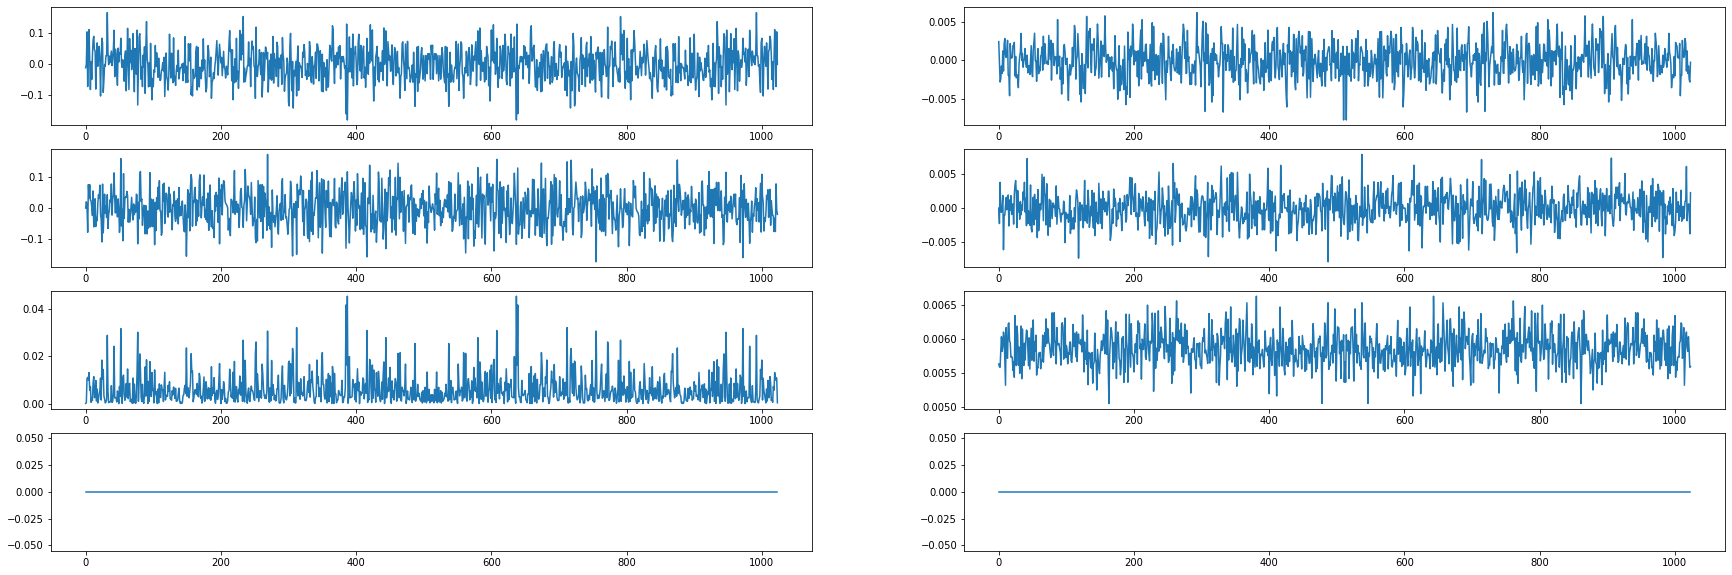

In [140]:
fig, ax = plt.subplots(4,2, figsize = (30,10))
nffts = 512
num_samples = 1024
variance = 2



corrs = np.zeros((nffts,num_samples),dtype=np.complex)
ffts = np.zeros((nffts,num_samples),dtype=np.complex)

for i in range(nffts):
    samples = np.random.normal(0, np.sqrt(variance), num_samples) + np.random.normal(0, np.sqrt(2*variance), num_samples) 
    fftavg = np.fft.fft(samples)/num_samples
    ffts[i][:] = fftavg
    pwr = fftavg*np.conj(fftavg)
    corrs[i][:] = pwr
    
    
corr = np.mean(corrs,axis=0,dtype=np.complex)
fft = np.mean(ffts,axis=0,dtype=np.complex)
    
ax[0,0].plot(ffts[1][:].real)
ax[1,0].plot(ffts[1][:].imag)
ax[2,0].plot(corrs[1][:])

ax[0,1].plot(fft.real)
ax[1,1].plot(fft.imag)
ax[2,1].plot(corr)

ax[3,0].plot(np.angle(corrs[1]))
ax[3,1].plot(np.angle(corr))


variance = variance/(2*num_samples) + 2*variance/(2*num_samples)

print('expected:', variance, 'actual:', np.var(ffts.real,axis=0,ddof=1))
print('expected:', variance, 'actual:', np.var(ffts.imag,axis=0,ddof=1))
print('expected:', 4*(variance)**2, 'actual:', np.var(corrs,axis=0,ddof=1))

print('expected:', 2*variance ,'actual:', np.mean(corr))

# What if Variance is very big 

expected: 0.09765625 actual: [0.19834072 0.10304581 0.09369835 ... 0.0879868  0.09369835 0.10304581]
expected: 0.09765625 actual: [0.        0.098409  0.0944268 ... 0.0894081 0.0944268 0.098409 ]
expected: 0.03814697265625 actual: [0.09038395 0.04517319 0.04034359 ... 0.03081795 0.04034359 0.04517319]
expected: 0.1953125 actual: (0.19472307631478775+0j)


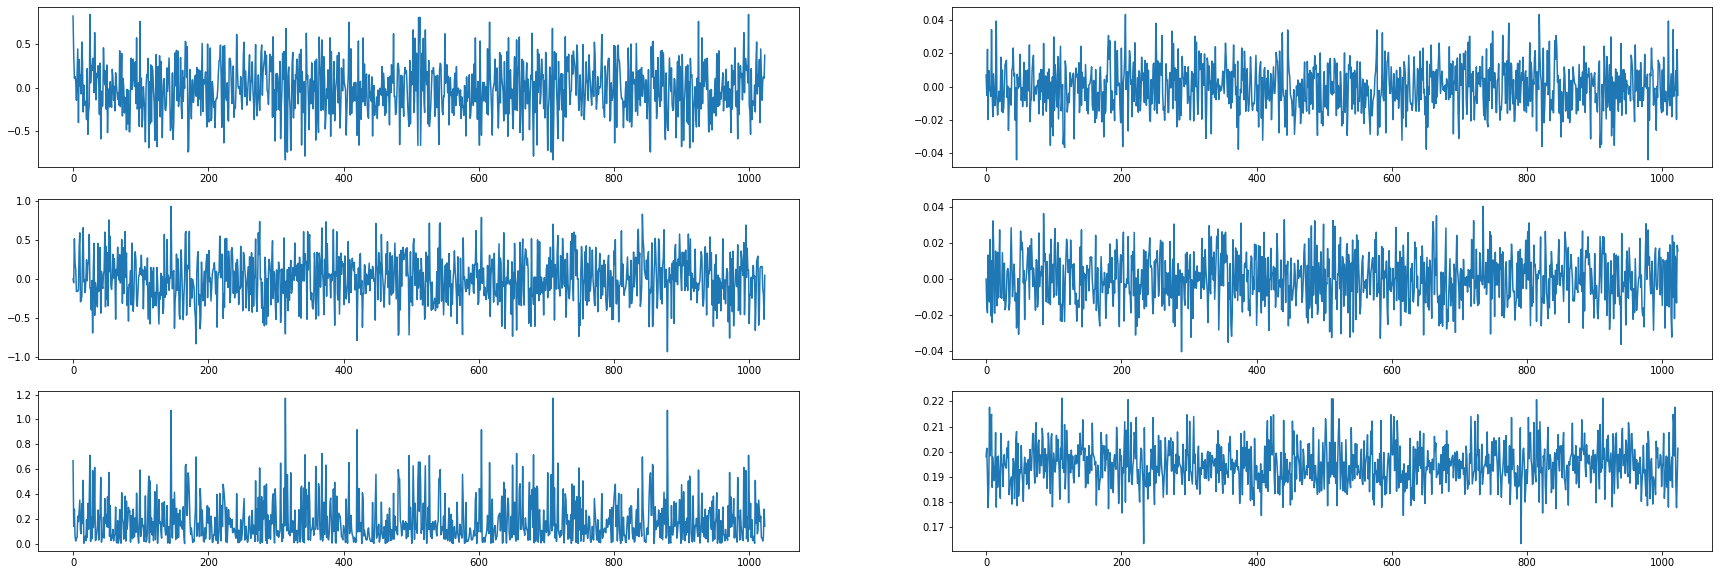

In [146]:
fig, ax = plt.subplots(3,2, figsize = (30,10))
nffts = 512
num_samples = 1024
variance = 200



corrs = np.zeros((nffts,num_samples),dtype=np.complex)
ffts = np.zeros((nffts,num_samples),dtype=np.complex)

for i in range(nffts):
    samples = np.random.normal(0, np.sqrt(variance), num_samples) 
    fftavg = np.fft.fft(samples)/num_samples
    ffts[i][:] = fftavg
    pwr = fftavg*np.conj(fftavg)
    corrs[i][:] = pwr
    
    
corr = np.mean(corrs,axis=0)
fft = np.mean(ffts,axis=0,dtype=np.complex)
    
ax[0,0].plot(ffts[1][:].real)
ax[1,0].plot(ffts[1][:].imag)
ax[2,0].plot(corrs[1][:])

ax[0,1].plot(fft.real)
ax[1,1].plot(fft.imag)
ax[2,1].plot(corr)

varpart = variance/(2*num_samples)

print('expected:', variance/(2*num_samples), 'actual:', np.var(ffts.real,axis=0,ddof=1))
print('expected:', variance/(2*num_samples), 'actual:', np.var(ffts.imag,axis=0,ddof=1))
print('expected:', 4*varpart**2 ,'actual:', np.var(corrs,axis=0,ddof=1))


print('expected:', 2*varpart ,'actual:', np.mean(corr))

# Walsh

expected: 3072.0 actual: [5273.77823233 3139.2830697  2883.44534268 ... 3184.24093517 2883.44534268
 3139.2830697 ]
expected: 3072.0 actual: [   0.         3158.48578503 3035.63176103 ... 3138.73216964 3035.63176103
 3158.48578503]
expected: 37748736.0 actual: [34176649.68403407 41121363.08773749 38311857.47697463 ...
 34780608.87008861 38311857.47697463 41121363.08773749]


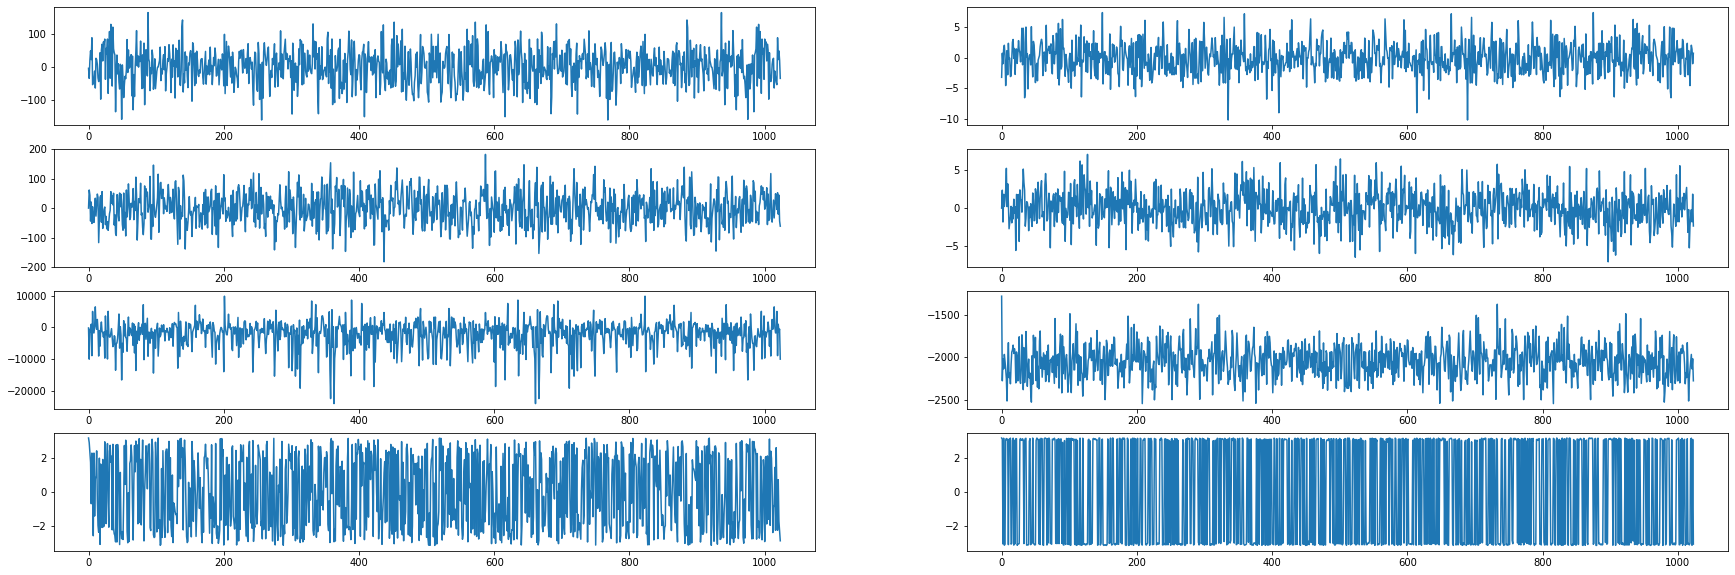

In [123]:
fig, ax = plt.subplots(4,2, figsize = (30,10))
nffts = 512
num_samples = 1024
variance = 2



corrs = np.zeros((nffts,num_samples),dtype=np.complex)
ffts = np.zeros((nffts,num_samples),dtype=np.complex)

for i in range(nffts):
    samplessig = np.random.normal(0, np.sqrt(variance), num_samples)
    samplesnoise =  np.random.normal(0, np.sqrt(2*variance), num_samples) 
    fftavg = np.fft.fft(samplessig+samplesnoise)
    fftwalsh = np.fft.fft(samplessig-samplesnoise)
    ffts[i][:] = fftavg
    pwr = fftavg*np.conj(fftwalsh)
    corrs[i][:] = pwr
    
    
corr = np.mean(corrs,axis=0,dtype=np.complex)
fft = np.mean(ffts,axis=0,dtype=np.complex)
    
ax[0,0].plot(ffts[1][:].real)
ax[1,0].plot(ffts[1][:].imag)
ax[2,0].plot(corrs[1][:])

ax[0,1].plot(fft.real)
ax[1,1].plot(fft.imag)
ax[2,1].plot(corr)

ax[3,0].plot(np.angle(corrs[1]))
ax[3,1].plot(np.angle(corr))

print('expected:', (3*variance/2)*num_samples, 'actual:', np.var(ffts.real,axis=0,ddof=1))
print('expected:', (3*variance/2)*num_samples, 'actual:', np.var(ffts.imag,axis=0,ddof=1))
print('expected:', (2*((3*variance/2)*num_samples)**2+2*((3*variance/2)*num_samples)**2), 'actual:', np.var(corrs,axis=0,ddof=1))

expected: 3072.0 actual: [5507.37650949 2909.83424796 3031.40866943 ... 3112.87035303 3031.40866943
 2909.83424796]
expected: 3072.0 actual: [   0.         3175.307164   2752.57466021 ... 3355.27758225 2752.57466021
 3175.307164  ]
expected: 37748736.0 actual: [67317344.47972606 60218327.77237019 47523130.69064832 ...
 64470228.15896868 47523130.69064832 60218327.7723702 ]


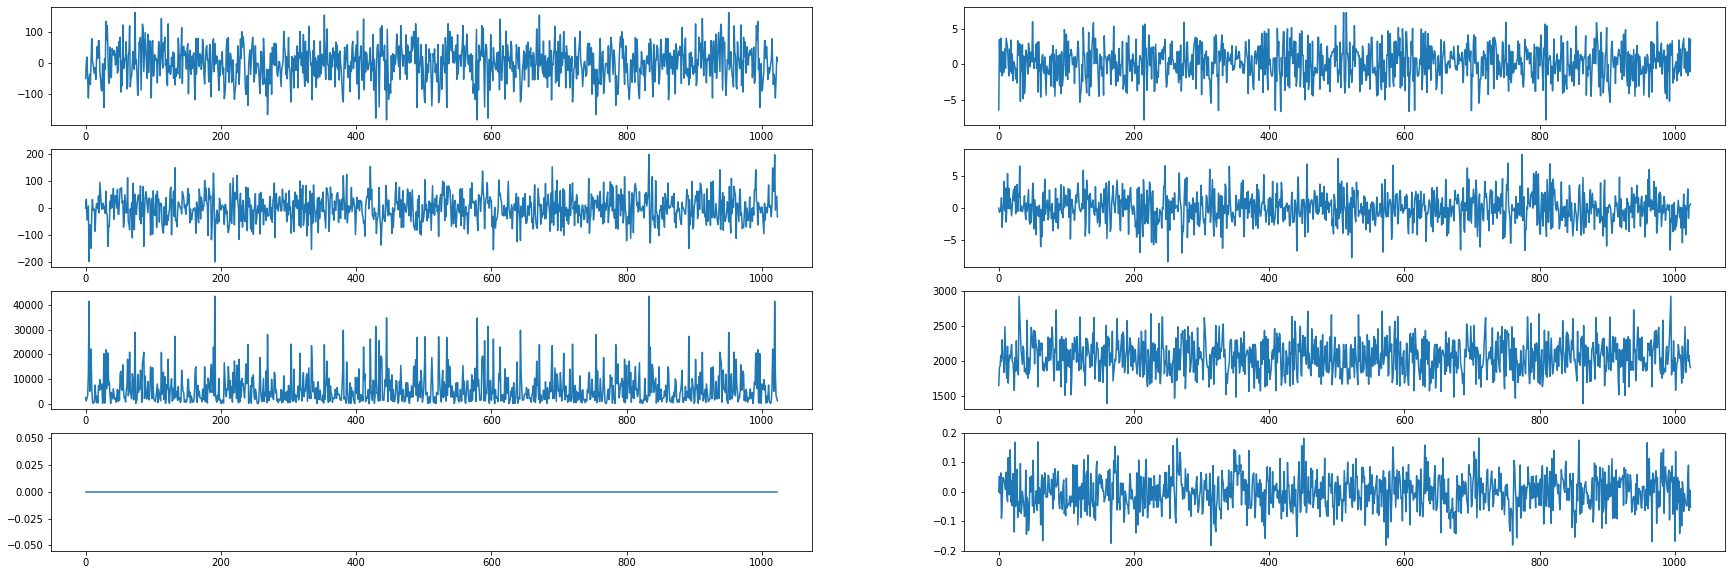

In [126]:
fig, ax = plt.subplots(4,2, figsize = (30,10))
nffts = 512
num_samples = 1024
variance = 2



corrs = np.zeros((nffts,num_samples),dtype=np.complex)
ffts = np.zeros((nffts,num_samples),dtype=np.complex)

for i in range(nffts):
    if i<=nffts//2:
        samples = np.random.normal(0, np.sqrt(variance), num_samples) + np.random.normal(0, np.sqrt(2*variance), num_samples) 
        fftavg = np.fft.fft(samples)
        ffts[i][:] = fftavg
        pwr = fftavg*np.conj(fftavg)
        corrs[i][:] = pwr
    else:
        samplessig = np.random.normal(0, np.sqrt(variance), num_samples)
        samplesnoise =  np.random.normal(0, np.sqrt(2*variance), num_samples) 
        fftavg = np.fft.fft(samplessig+samplesnoise)
        fftwalsh = np.fft.fft(samplessig-samplesnoise)
        ffts[i][:] = fftavg
        pwr = fftavg*np.conj(fftwalsh)
        corrs[i][:] = pwr
    
corr = np.mean(corrs,axis=0,dtype=np.complex)
fft = np.mean(ffts,axis=0,dtype=np.complex)
    
ax[0,0].plot(ffts[1][:].real)
ax[1,0].plot(ffts[1][:].imag)
ax[2,0].plot(corrs[1][:])

ax[0,1].plot(fft.real)
ax[1,1].plot(fft.imag)
ax[2,1].plot(corr)

ax[3,0].plot(np.angle(corrs[1]))
ax[3,1].plot(np.angle(corr))

print('expected:', (3*variance/2)*num_samples, 'actual:', np.var(ffts.real,axis=0,ddof=1))
print('expected:', (3*variance/2)*num_samples, 'actual:', np.var(ffts.imag,axis=0,ddof=1))
print('expected:', (2*((3*variance/2)*num_samples)**2+2*((3*variance/2)*num_samples)**2), 'actual:', np.var(corrs,axis=0,ddof=1))